Analyzing top 5 most traded coins: ['HYPE', '@107', 'BTC', 'ETH', 'SOL']

--- Average PnL by Coin and Sentiment ---
    coin classification  closed_pnl
0   @107           Fear   13.835667
1   @107          Greed  189.038983
3    BTC           Fear   34.148555
4    BTC          Greed   45.483076
7    ETH           Fear  269.038782
8    ETH          Greed   12.307966
10  HYPE           Fear   32.061303
11  HYPE          Greed   14.639216
13   SOL           Fear  195.968687
14   SOL          Greed   -2.624672

Generated heatmap: coin_pnl_heatmap.png


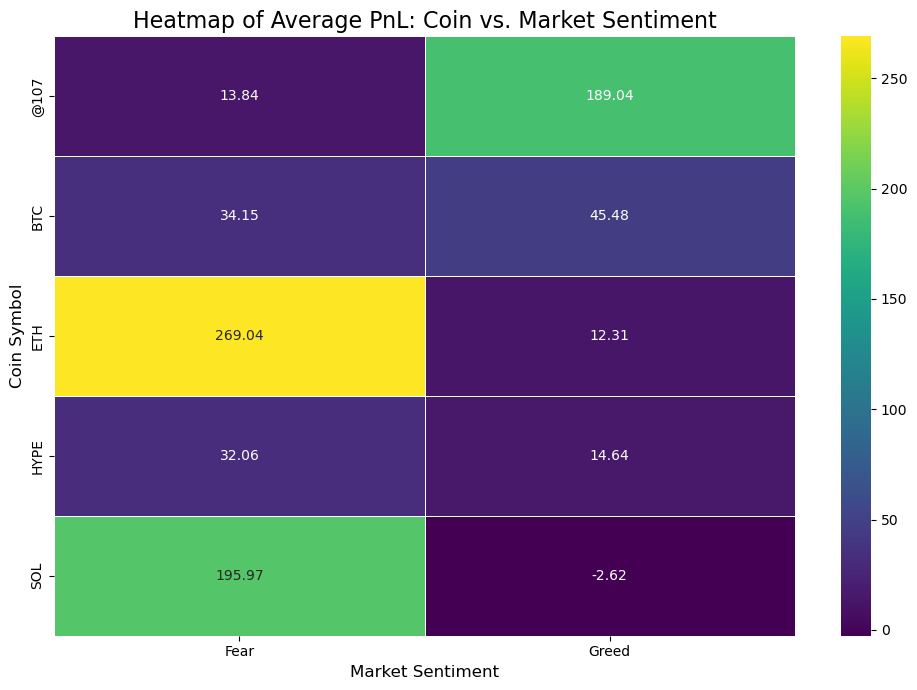

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

trader_df = pd.read_csv('historical_data.csv')
sentiment_df = pd.read_csv('fear_greed_index.csv')

trader_df.columns = trader_df.columns.str.lower().str.replace(' ', '_')
sentiment_df.columns = sentiment_df.columns.str.lower().str.replace(' ', '_')

trader_df['timestamp'] = pd.to_datetime(trader_df['timestamp'], unit='ms')
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

trader_df['date_only'] = trader_df['timestamp'].dt.date
trader_df['date_only'] = pd.to_datetime(trader_df['date_only'])

merged_df = pd.merge(trader_df, sentiment_df, left_on='date_only', right_on='date', how='left')
merged_df.dropna(subset=['classification'], inplace=True)


top_coins = merged_df['coin'].value_counts().nlargest(5).index
print(f"Analyzing top 5 most traded coins: {list(top_coins)}\n")

top_coins_df = merged_df[merged_df['coin'].isin(top_coins)]

coin_sentiment_pnl = top_coins_df.groupby(['coin', 'classification'])['closed_pnl'].mean().reset_index()

coin_sentiment_pnl = coin_sentiment_pnl[coin_sentiment_pnl['classification'].isin(['Fear', 'Greed'])]

print("--- Average PnL by Coin and Sentiment ---")
print(coin_sentiment_pnl)

pnl_pivot_table = coin_sentiment_pnl.pivot_table(values='closed_pnl', index='coin', columns='classification')

plt.figure(figsize=(10, 7))
sns.heatmap(pnl_pivot_table, annot=True, fmt=".2f", cmap="viridis", linewidths=.5)
plt.title('Heatmap of Average PnL: Coin vs. Market Sentiment', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Coin Symbol', fontsize=12)
plt.tight_layout()
plt.savefig("coin_pnl_heatmap.png")
print("\nGenerated heatmap: coin_pnl_heatmap.png")